# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# counter initialization
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record += 1        
        # thread..
        time.sleep(1.01)
        
    # skip if not found
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Rikitea
Processing Record 2 | Kapaa
Processing Record 3 | Bluff
Processing Record 4 | Rawson
Processing Record 5 | Ushuaia
Processing Record 6 | Ulladulla
Processing Record 7 | Maragogi
Processing Record 8 | Tiksi
Processing Record 9 | Ancud
Processing Record 10 | Kodiak
Processing Record 11 | Tanete
Processing Record 12 | Hobart
Processing Record 13 | Fort Nelson
Processing Record 14 | Ostersund
Processing Record 15 | Renukut
Processing Record 16 | Narsaq
City not found. Skipping...
Processing Record 17 | Altay
City not found. Skipping...
Processing Record 18 | Castro
Processing Record 19 | Punta Arenas
Processing Record 20 | Sohbatpur
Processing Record 21 | Newport
Processing Record 22 | Pacific Grove
Processing Record 23 | Novikovo
Processing Record 24 | Albany
Processing Record 25 | Isangel
Processing Record 26 | Vaini
Processing Record 27 | Alice Springs
Processing Record 28 

Processing Record 224 | Dakar
Processing Record 225 | Klaksvik
Processing Record 226 | Clinton
City not found. Skipping...
Processing Record 227 | Effingham
Processing Record 228 | Samarai
Processing Record 229 | Chicama
Processing Record 230 | Hobyo
City not found. Skipping...
Processing Record 231 | Henties Bay
Processing Record 232 | Yinchuan
Processing Record 233 | Bowen
Processing Record 234 | Coquimbo
Processing Record 235 | Port Hawkesbury
Processing Record 236 | Saint Anthony
Processing Record 237 | Bobrovka
Processing Record 238 | Ohara
Processing Record 239 | Sola
Processing Record 240 | Hambantota
Processing Record 241 | Aklavik
City not found. Skipping...
Processing Record 242 | Tamiami
Processing Record 243 | Talnakh
Processing Record 244 | High Level
Processing Record 245 | Denpasar
Processing Record 246 | Varhaug
Processing Record 247 | Adrar
Processing Record 248 | Lasa
Processing Record 249 | Suleja
Processing Record 250 | Tual
Processing Record 251 | Meulaboh
Processi

Processing Record 453 | Berlevag
Processing Record 454 | Mouzouras
Processing Record 455 | Dunmore East
City not found. Skipping...
Processing Record 456 | Obo
City not found. Skipping...
Processing Record 457 | Cavalcante
Processing Record 458 | Millville
Processing Record 459 | Halifax
Processing Record 460 | Kearney
Processing Record 461 | Camargo
Processing Record 462 | Prince Rupert
Processing Record 463 | Lethem
Processing Record 464 | Great Falls
Processing Record 465 | Shelopugino
Processing Record 466 | Miyazu
Processing Record 467 | Timra
Processing Record 468 | Yigou
Processing Record 469 | Kilrush
Processing Record 470 | Pital
Processing Record 471 | Whitehorse
Processing Record 472 | Suhbaatar
City not found. Skipping...
Processing Record 473 | Kawalu
Processing Record 474 | Mildura
City not found. Skipping...
Processing Record 475 | Coahuayana
Processing Record 476 | Schneverdingen
City not found. Skipping...
Processing Record 477 | Prince Albert
City not found. Skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data.to_csv(output_data_file)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,67,PF,1570158751,79,-23.12,-134.97,69.36,23.69
1,Kapaa,40,US,1570158557,70,22.08,-159.32,87.80,18.34
2,Bluff,0,AU,1570158809,22,-23.58,149.07,82.28,13.85
3,Rawson,32,AR,1570158811,47,-43.30,-65.11,53.03,24.23
4,Ushuaia,40,AR,1570158812,52,-54.81,-68.31,46.40,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

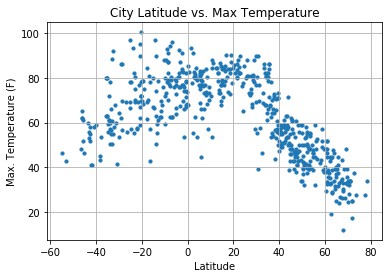

In [6]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("city_lat_vs_max_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

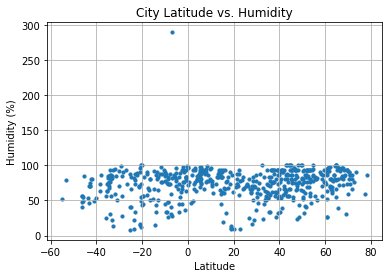

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("city_lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

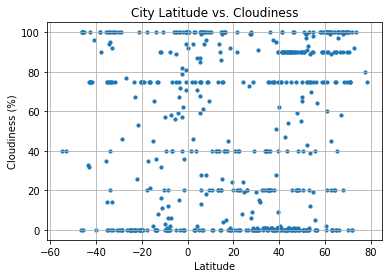

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("city_lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

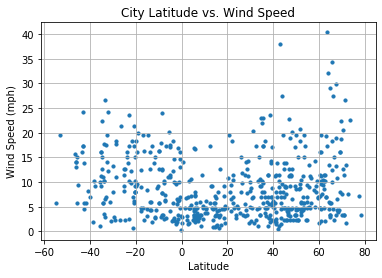

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("city_lat_vs_win_speed.png")
plt.show()